In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
from data.us100.custom_functions import *

In [3]:

path = "D:\\boobogo\\coding\\trade\\data\\us100\\data_engineered\\US_TECH100_1min_indicators.csv"
df = pd.read_csv(path, parse_dates=True, index_col='datetime')

In [4]:
df

,open_1min,high_1min,low_1min,close_1min,macd_1min,macd_signal_1min,rsi_1min,bb_mavg_1min,bb_upper_1min,bb_lower_1min,bb_hband_indicator_1min,bb_lband_indicator_1min,atr_1min
datetime,,,,,,,,,,,,,
2020-12-02 00:33:00,12443.00,12445.75,12443.00,12445.75,0.58,-0.05,58.00,12441.28,12446.51,12436.04,0,0,3.32
2020-12-02 00:34:00,12446.00,12446.50,12444.25,12446.25,0.81,0.12,58.92,12441.55,12447.21,12435.89,0,0,3.24
2020-12-02 00:35:00,12446.00,12446.25,12444.25,12445.25,0.91,0.28,56.25,12441.88,12447.60,12436.15,0,0,3.15
2020-12-02 00:36:00,12444.75,12445.50,12443.25,12443.25,0.82,0.39,51.26,12442.01,12447.73,12436.30,0,0,3.09
2020-12-02 00:37:00,12443.50,12444.25,12442.75,12443.75,0.77,0.46,52.40,12442.22,12447.87,12436.58,0,0,2.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01 20:54:00,20164.50,20166.25,20162.50,20162.75,-1.22,-0.60,42.55,20167.11,20173.42,20160.81,0,0,3.48
2024-11-01 20:55:00,20162.75,20163.75,20160.00,20162.75,-1.31,-0.74,42.55,20166.78,20173.25,20160.30,0,0,3.50
2024-11-01 20:56:00,20162.50,20166.75,20162.25,20165.25,-1.17,-0.83,48.43,20166.44,20172.48,20160.40,0,0,3.57


In [5]:
df = df[['open_1min','close_1min']]

In [6]:
df = df.rename(columns={'open_1min':'open','close_1min':'close'})

In [9]:
for i in range(1, 61, 2):
    add_indicators(df, ['macd'], f'{i}m', i)

In [11]:
df = df.dropna()
df.head(2)

,open,close,macd_1m,macd_signal_1m,macd_diff_1m,macd_3m,macd_signal_3m,macd_diff_3m,macd_5m,macd_signal_5m,...,macd_diff_53m,macd_55m,macd_signal_55m,macd_diff_55m,macd_57m,macd_signal_57m,macd_diff_57m,macd_59m,macd_signal_59m,macd_diff_59m
datetime,,,,,,,,,,,,,,,,,,,,,
2020-12-03 12:13:00,12482.25,12482.75,1.38,1.50,-0.12,2.22,1.70,0.51,2.26,1.43,...,-0.23,10.25,10.34,-0.09,10.39,10.39,0.01,10.51,10.45,0.06
2020-12-03 12:14:00,12482.75,12482.75,1.28,1.46,-0.18,2.22,1.74,0.48,2.29,1.47,...,-0.22,10.26,10.34,-0.09,10.40,10.39,0.01,10.51,10.45,0.07


In [ ]:
'''
crossover_window = 5  # Number of points to emphasize after crossover

# Initialize the feature with zeros
df['macd_crossover_window'] = 0

# Assign a value of 1 to the next `crossover_window` points after each crossover
for i in range(len(df)):
    if df.loc[i, 'macd_crossover'] == 1:
        df.loc[i:i + crossover_window - 1, 'macd_crossover_window'] = 1
'''

'''
# Decaying weights, e.g., exponential decay
decay_weights = np.linspace(1, 0, crossover_window)

df['macd_crossover_weighted'] = 0

for i in range(len(df)):
    if df.loc[i, 'macd_crossover'] == 1:
        for j in range(crossover_window):
            if i + j < len(df):  # Ensure index does not exceed DataFrame length
                df.loc[i + j, 'macd_crossover_weighted'] += decay_weights[j]

'''
'''
# Compute the rate of change or differences:
df['macd_diff'] = df['macd'].diff()
df['signal_diff'] = df['signal'].diff()

'''

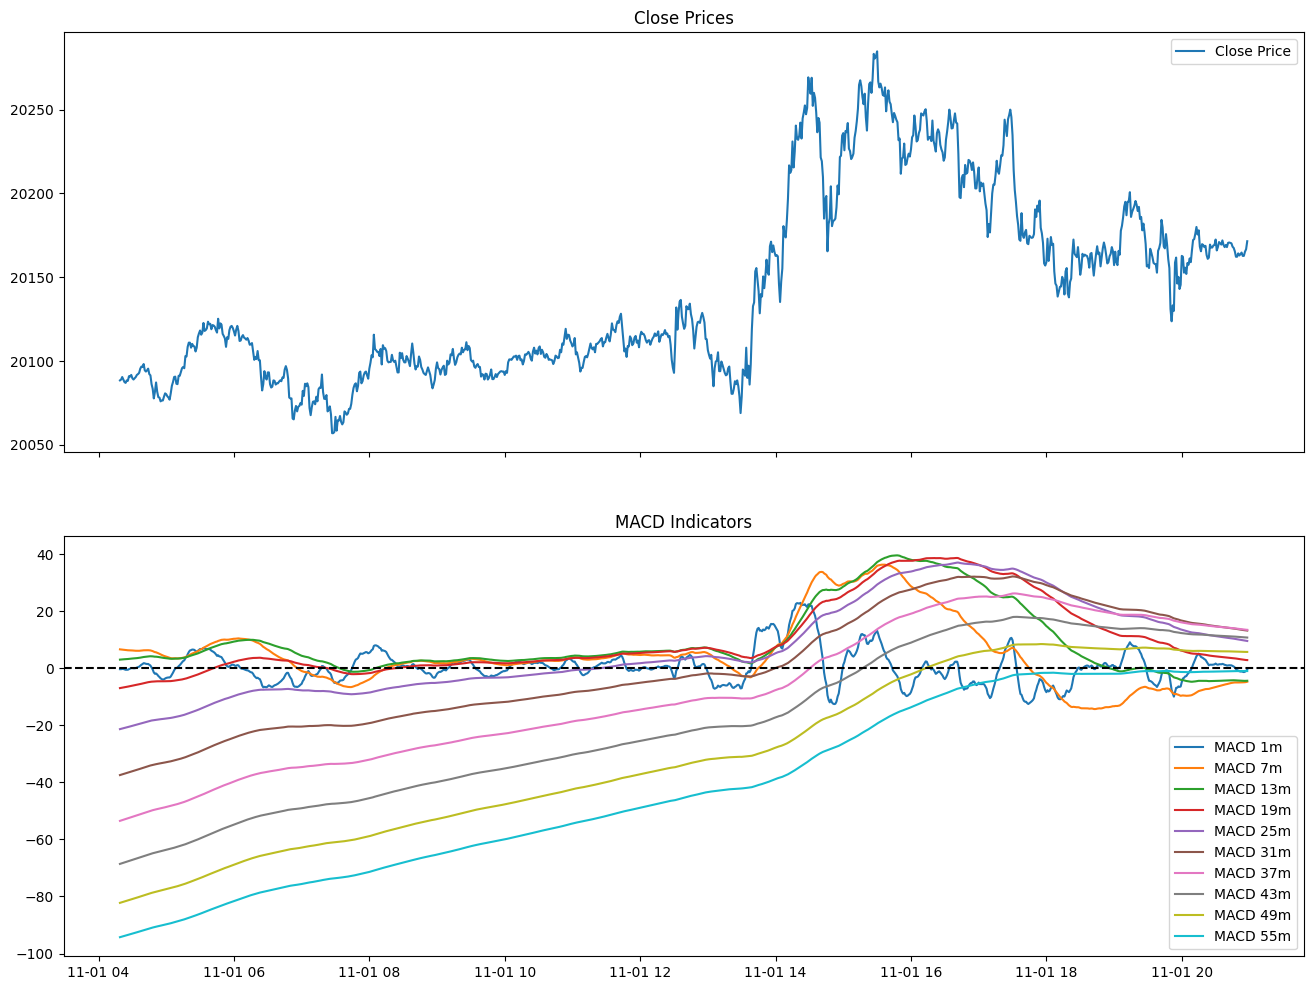

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
df1 = df.iloc[-1000:]
# Plot close prices on the top window
ax1.plot(df1.index, df1['close'], label='Close Price')
ax1.set_title('Close Prices')
ax1.legend()

# Plot MACD indicators on the bottom window
ax2.plot(df1.index, df1['macd_1m'], label='MACD 1m')
ax2.plot(df1.index, df1['macd_7m'], label='MACD 7m')
ax2.plot(df1.index, df1['macd_13m'], label='MACD 13m')
ax2.plot(df1.index, df1['macd_19m'], label='MACD 19m')
ax2.plot(df1.index, df1['macd_25m'], label='MACD 25m')
ax2.plot(df1.index, df1['macd_31m'], label='MACD 31m')
ax2.plot(df1.index, df1['macd_37m'], label='MACD 37m')
ax2.plot(df1.index, df1['macd_43m'], label='MACD 43m')
ax2.plot(df1.index, df1['macd_49m'], label='MACD 49m')
ax2.plot(df1.index, df1['macd_55m'], label='MACD 55m')
ax2.set_title('MACD Indicators')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.legend()

plt.show()

In [48]:
df1.head(2)

,open,close,macd_1m,macd_signal_1m,macd_diff_1m,macd_3m,macd_signal_3m,macd_diff_3m,macd_5m,macd_signal_5m,...,macd_diff_53m,macd_55m,macd_signal_55m,macd_diff_55m,macd_57m,macd_signal_57m,macd_diff_57m,macd_59m,macd_signal_59m,macd_diff_59m
datetime,,,,,,,,,,,,,,,,,,,,,
2024-11-01 04:19:00,20089.50,20088.5,-0.29,-0.40,0.12,2.92,4.47,-1.55,5.99,6.66,...,14.71,-94.27,-108.00,13.73,-97.91,-110.57,12.66,-101.37,-112.88,11.51
2024-11-01 04:20:00,20088.75,20089.0,-0.30,-0.38,0.08,2.82,4.35,-1.53,5.91,6.62,...,14.76,-94.15,-107.94,13.79,-97.80,-110.52,12.72,-101.26,-112.84,11.58
